In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [8]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "himanshunakrani/student-study-hours",
    "score.csv",
)

print(df.head())


100%|██████████| 187/187 [00:00<00:00, 201kB/s]

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [9]:
X = df[['Hours']]
y = df['Scores']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 20
Testing set size: 5


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [11]:
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
predictions = model.predict(X_test)

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})
print(results)

    Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153


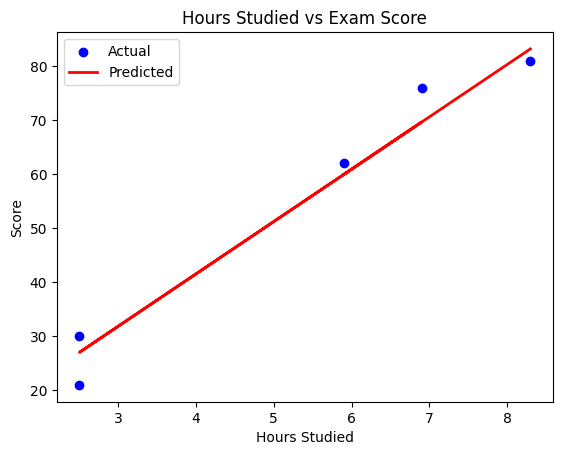

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted')
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.legend()
plt.show()

In [14]:
hours = 5.5
predicted_score = model.predict([[hours]])
print(f"Predicted score for a student studying {hours} hours: {predicted_score[0]:.2f}")


Predicted score for a student studying 5.5 hours: 56.08


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
